In [2]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc('image', cmap = 'gray')
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


C:\Users\skme2\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [3]:
data = r_[10*randn(1000,2)+array([70,30]),
          10*randn(1000,2)+array([10,10]),
          10*randn(1000,2)+array([50,80])]
data = data[pyrandom.sample(range(len(data)),len(data))]

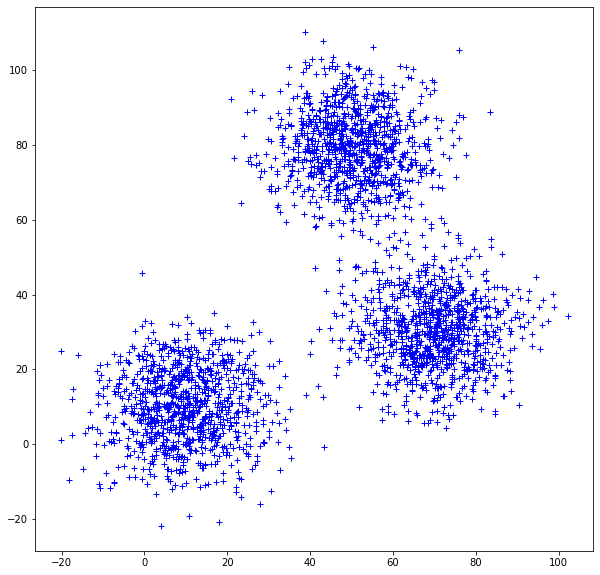

In [4]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')

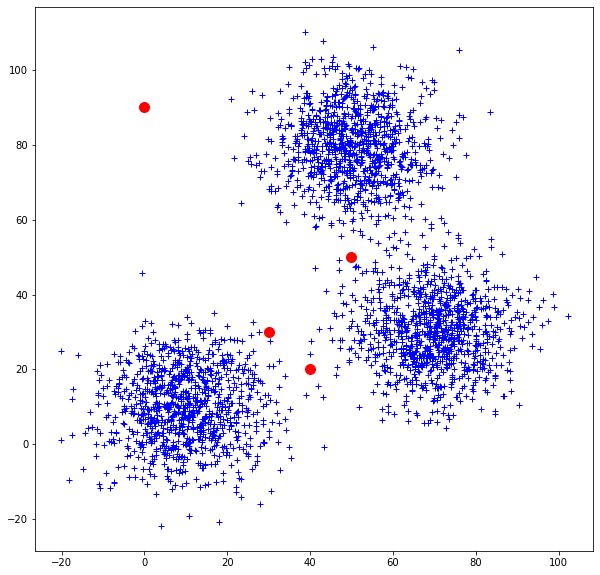

In [5]:
protos = array([[30,30],[40,20],[0,90],[50,50]]) 
start = protos.copy()

figsize(10,10)
plot(data[:,0],data[:,1],'b+')
plot(protos[:,0],protos[:,1],'ro',markersize=10)

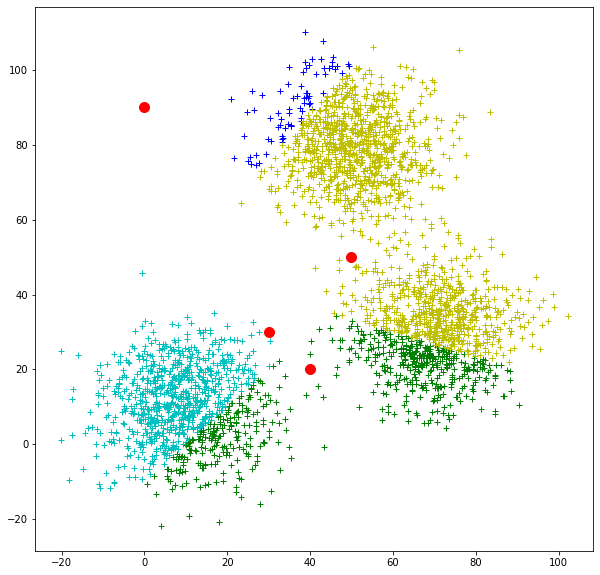

In [6]:
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
    plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [7]:
history = [protos.copy()]

for i in range(len(protos)):
    protos[i,:] = average(data[closest==i],axis=0)
    
history.append(protos.copy())

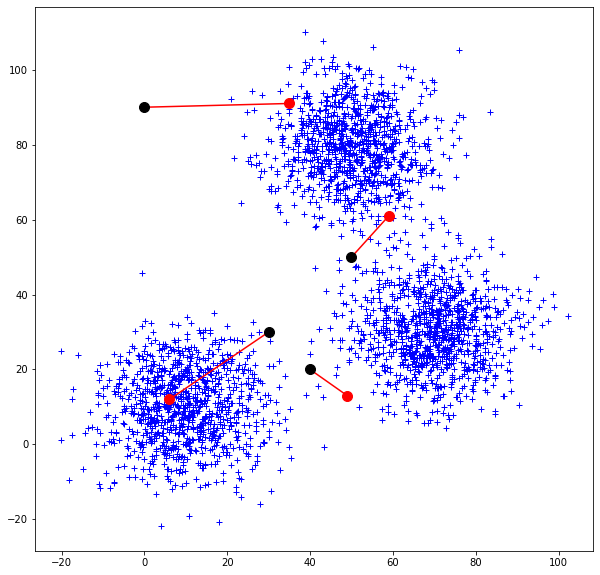

In [8]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
harray = array(history)
for i in range(len(protos)):
    plot(harray[:,i,0],harray[:,i,1],'r')
plot(harray[0,:,0],harray[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [9]:
for round in range(1000):
    if round%100==0: sys.stderr.write("%d "%round)
    dists = cdist(protos,data)
    closest = argmin(dists,axis=0)
    for i in range(len(protos)):
            protos[i,:] = average(data[closest==i],axis=0)
    history.append(protos.copy())

0 100 200 300 400 500 600 700 800 900 

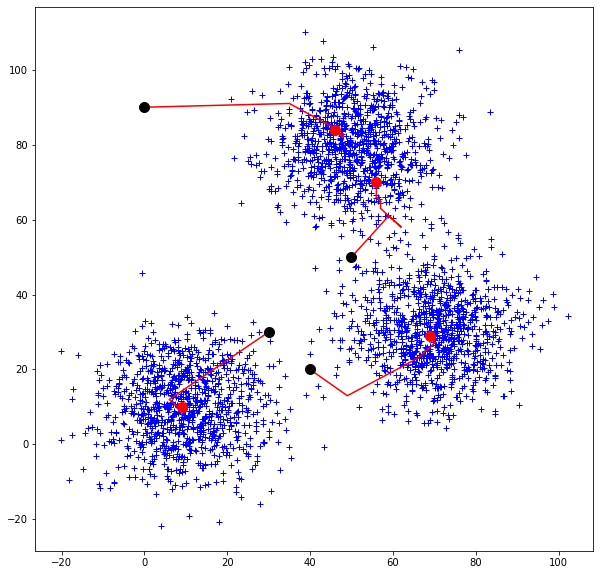

In [10]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
history = array(history)
for i in range(len(protos)):
    plot(history[:,i,0],history[:,i,1],'r')
plot(history[0,:,0],history[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

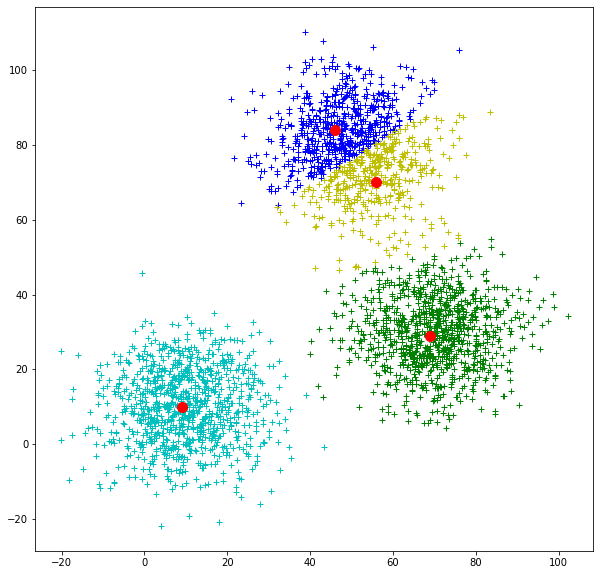

In [11]:
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
  plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [12]:
%matplotlib inline

In [15]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
X = dataset.iloc[:,3:]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [20]:
from sklearn.cluster import KMeans

C:\Users\skme2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


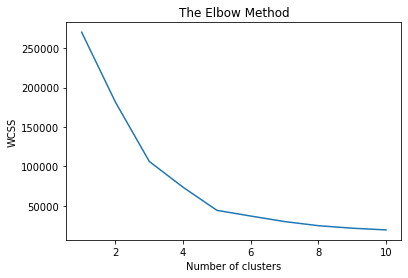

In [21]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [23]:
test=kmeans.predict(np.asarray([[3,3]]))
test[0]

2

In [24]:
import pickle
filename = 'finalized_model.pickle'
pickle.dump(kmeans, open(filename, 'wb'))

In [25]:
X[y_kmeans==0]

,Annual Income (k$),Spending Score (1-100)
43,39,61
46,40,55
47,40,47
48,40,42
49,40,42
...,...,...
121,67,40
122,69,58
126,71,35
132,72,34


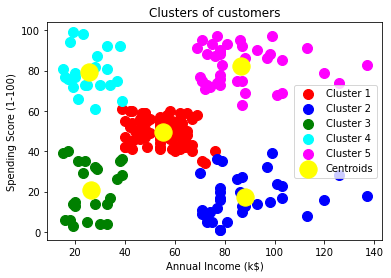

In [26]:
plt.scatter(X[y_kmeans == 0]['Annual Income (k$)'], X[y_kmeans == 0]['Spending Score (1-100)'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Annual Income (k$)'], X[y_kmeans == 1]['Spending Score (1-100)'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Annual Income (k$)'], X[y_kmeans == 2]['Spending Score (1-100)'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Annual Income (k$)'], X[y_kmeans == 3]['Spending Score (1-100)'], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Annual Income (k$)'], X[y_kmeans == 4]['Spending Score (1-100)'], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [27]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

In [28]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)

In [29]:
minibatch_kmeans.fit(X)

C:\Users\skme2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=5)

In [30]:
import random as pyrandom
from scipy.spatial.distance import cdist
figsize(6,6)

In [31]:
ccolors = ['go', 'ro','bo','mo','co','yo']
def plotclusters(data,centers=None):
    xlim([0,100]); ylim([0,100])
    if centers is None:
        plot(data[:,0],data[:,1],'bo',markersize=5)
    else:
        for i in range(amax(centers)+1):
            plot(data[centers==i,0],data[centers==i,1],ccolors[i%len(ccolors)],markersize=5)

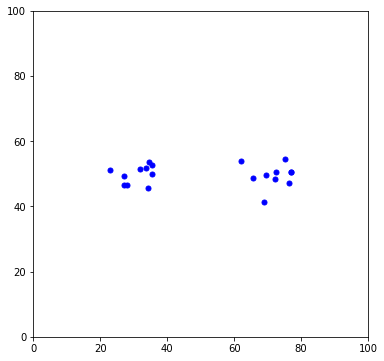

In [32]:
data = r_[4*randn(10,2)+array([70,50]),
          4*randn(10,2)+array([30,50])]

plotclusters(data)

In [33]:
from scipy.spatial.distance import cdist
ds = cdist(data,data)

In [34]:
from scipy.cluster.hierarchy import *
lm = linkage(ds,"single")
lm[:5]

<ipython-input-34-d38431098767>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  lm = linkage(ds,"single")


array([[ 2.        ,  7.        ,  0.43133235,  2.        ],
       [12.        , 19.        ,  2.82279779,  2.        ],
       [15.        , 18.        ,  3.81237477,  2.        ],
       [ 5.        ,  8.        ,  4.56732117,  2.        ],
       [11.        , 22.        ,  5.54538766,  3.        ]])

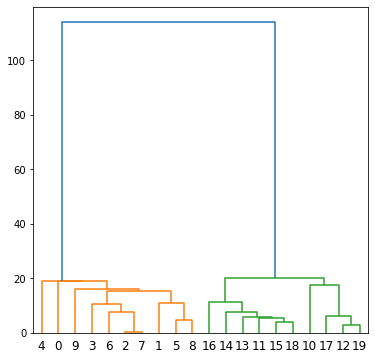

In [35]:
_=dendrogram(lm)

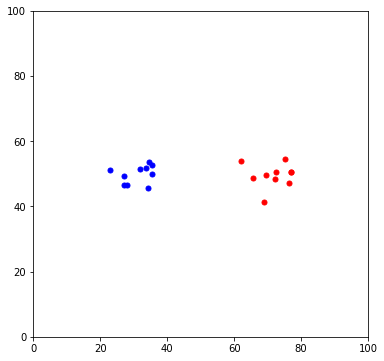

In [36]:
plotclusters(data,fcluster(lm,2,criterion='maxclust'))

In [37]:
data = r_[dot(randn(100,2),diag([4,10]))+array([60,60]),
           dot(randn(100,2),diag([4,10]))+array([40,40])]
shuffle(data)

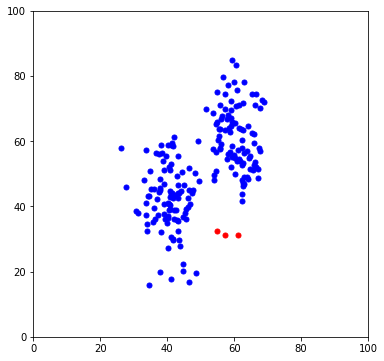

In [38]:
assignment = fclusterdata(data,2,metric='euclidean',method='single',criterion='maxclust')
plotclusters(data,assignment)

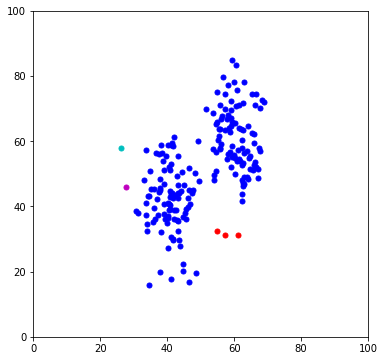

In [39]:
assignment = fclusterdata(data,4,metric='euclidean',method='single',criterion='maxclust')
plotclusters(data,assignment)

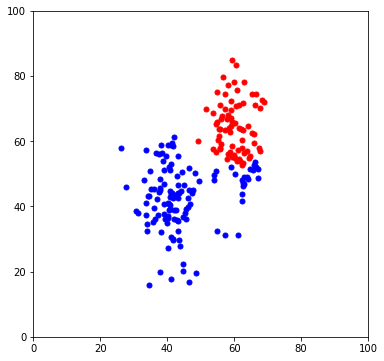

In [40]:
assignment = fclusterdata(data,2,metric='euclidean',method='complete',criterion='maxclust')
plotclusters(data,assignment)

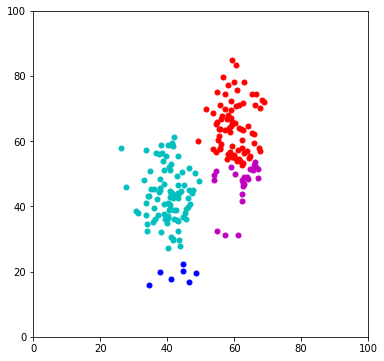

In [41]:
assignment = fclusterdata(data,4,metric='euclidean',method='complete',criterion='maxclust')
plotclusters(data,assignment)

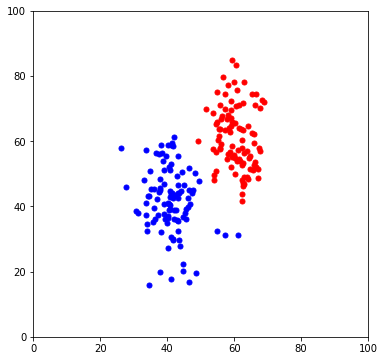

In [42]:
assignment = fclusterdata(data,2,metric='euclidean',method='average',criterion='maxclust')
plotclusters(data,assignment)

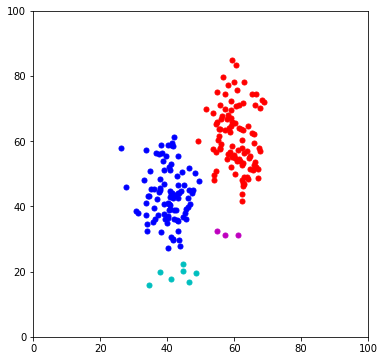

In [43]:
assignment = fclusterdata(data,4,metric='euclidean',method='average',criterion='maxclust')
plotclusters(data,assignment)

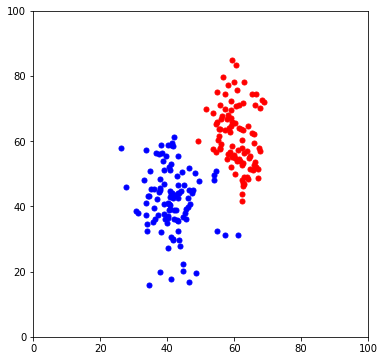

In [44]:
lm = linkage(data,metric='euclidean',method='centroid')
assignment = fcluster(lm,2,criterion='maxclust')
plotclusters(data,assignment)

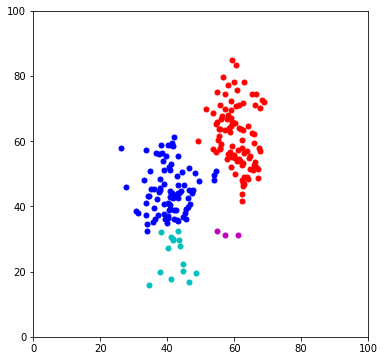

In [45]:
lm = linkage(data,metric='euclidean',method='centroid')
assignment = fcluster(lm,4,criterion='maxclust')
plotclusters(data,assignment)

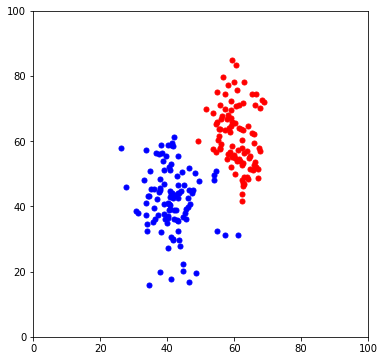

In [46]:
lm = linkage(data,metric='euclidean',method='ward')
assignment = fcluster(lm,2,criterion='maxclust')
plotclusters(data,assignment)

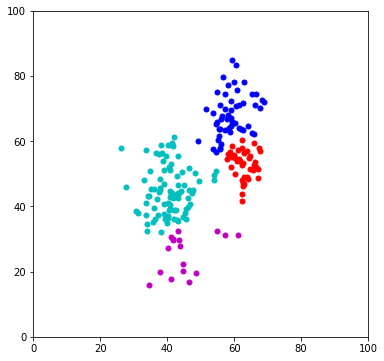

In [47]:
lm = linkage(data,metric='euclidean',method='ward')
assignment = fcluster(lm,4,criterion='maxclust')
plotclusters(data,assignment)

In [48]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [49]:
centers = [[1, 1], [-1, -1], [1, -1]]  
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)  # generate sample blobs

X = StandardScaler().fit_transform(X)

In [50]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)  
core_samples_mask[db.core_sample_indices_] = True  
labels = db.labels_ 

In [51]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [52]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


In [53]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

Homogeneity: 0.953


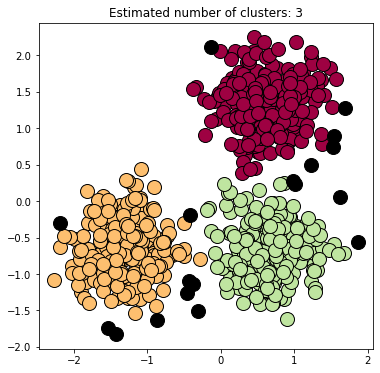

In [54]:
import matplotlib.pyplot as plt
unique_labels = set(labels) 
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))] 



for k, col in zip(unique_labels, colors):
    
    
    if k == -1:
       col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    

    xy = X[class_member_mask & core_samples_mask] 
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    

    xy = X[class_member_mask & ~core_samples_mask] 
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    
    

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [55]:
print("Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))

Rand Index: 0.952


In [63]:
metrics.jaccard_score(labels_true, labels,average=None)

array([0.        , 0.96414343, 0.96812749, 0.97211155])

In [64]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
   
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [65]:
purity_score(labels_true, labels)

0.9813333333333333